# Desarrollo Modulo 1 Proyecto Aprendizaje de Máquina
## Prediccion de Velocidad
### Alumno: Diego Leonardo Campillay Manriquez
### Profesor: Pablo Hernan Schwarzenberg Riveros
### NRC:7056

## 1.- Data collection


In [2]:
#Tratamiento de datos
import pandas as pd
import numpy as np

#Graficos
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

#Preprocesado y modelado
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
data = pd.read_excel("p2_serie_de_tiempo.xlsx")

In [4]:
data.head()

,ID,Fecha,Horas,Agno,Mes,Dia_mes,Dia_sem,fest,20,21,...,58,59,60,61,62,64,65,66,67,68
0,1,2015-01-01,6,2015,1,1,4,1,76.967742,65.548387,...,64.645161,46.612903,89.967742,83.451613,90.645161,85.838710,85.612903,88.258065,85.709677,85.096774
1,2,2015-01-01,7,2015,1,1,4,1,70.451613,66.467742,...,56.661290,48.806452,75.209677,79.758065,68.161290,83.096774,81.048387,78.370968,73.306452,70.129032
2,3,2015-01-01,8,2015,1,1,4,1,77.903226,47.193548,...,59.000000,46.709677,72.741935,71.161290,65.096774,81.870968,79.225806,77.000000,70.419355,56.548387
3,4,2015-01-01,9,2015,1,1,4,1,70.806452,48.338710,...,54.758065,49.000000,75.612903,78.741935,79.419355,84.741935,80.419355,83.516129,75.741935,65.774194
4,5,2015-01-01,10,2015,1,1,4,1,68.451613,50.924731,...,50.473118,55.290323,75.645161,81.612903,75.064516,85.870968,80.838710,83.709677,77.677419,66.322581


In [5]:
data.tail()

,ID,Fecha,Horas,Agno,Mes,Dia_mes,Dia_sem,fest,20,21,...,58,59,60,61,62,64,65,66,67,68
7303,7304,2016-12-30,15,2016,12,30,5,1,12.0,38.5,...,61.5,38.0,58.0,55.0,21.5,25.5,36.0,45.5,33.0,38.5
7304,7305,2016-12-30,16,2016,12,30,5,1,49.5,44.0,...,28.0,42.0,60.0,30.0,88.0,89.0,86.5,84.0,90.0,90.0
7305,7306,2016-12-30,17,2016,12,30,5,1,30.0,54.0,...,41.0,48.0,81.0,72.0,77.0,71.0,79.0,74.0,72.0,77.0
7306,7307,2016-12-30,18,2016,12,30,5,1,38.0,38.0,...,26.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0
7307,7308,2016-12-30,19,2016,12,30,5,1,36.0,28.0,...,28.0,47.0,32.0,25.0,25.0,26.0,58.0,71.0,73.0,75.0


In [6]:
print(data)

        ID      Fecha  Horas  Agno  Mes  Dia_mes  Dia_sem  fest         20   
0        1 2015-01-01      6  2015    1        1        4     1  76.967742  \
1        2 2015-01-01      7  2015    1        1        4     1  70.451613   
2        3 2015-01-01      8  2015    1        1        4     1  77.903226   
3        4 2015-01-01      9  2015    1        1        4     1  70.806452   
4        5 2015-01-01     10  2015    1        1        4     1  68.451613   
...    ...        ...    ...   ...  ...      ...      ...   ...        ...   
7303  7304 2016-12-30     15  2016   12       30        5     1  12.000000   
7304  7305 2016-12-30     16  2016   12       30        5     1  49.500000   
7305  7306 2016-12-30     17  2016   12       30        5     1  30.000000   
7306  7307 2016-12-30     18  2016   12       30        5     1  38.000000   
7307  7308 2016-12-30     19  2016   12       30        5     1  36.000000   

             21  ...         58         59         60         6

In [7]:
data.describe()

,ID,Fecha,Horas,Agno,Mes,Dia_mes,Dia_sem,fest,20,21,...,58,59,60,61,62,64,65,66,67,68
count,7308.000000,7308,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.0,7308.000000,7308.000000,...,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000
mean,3654.500000,2016-01-01 02:20:41.379310592,12.500000,2015.500000,6.532567,15.697318,3.005747,1.0,71.125408,52.484308,...,44.398710,43.690538,65.702178,71.219704,72.261489,73.287025,73.209006,73.928125,72.313911,60.004856
min,1.000000,2015-01-01 00:00:00,6.000000,2015.000000,1.000000,1.000000,1.000000,1.0,7.000000,9.000000,...,11.500000,1.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1827.750000,2015-07-02 00:00:00,9.000000,2015.000000,4.000000,8.000000,2.000000,1.0,67.000000,46.500000,...,36.500000,37.500000,57.000000,65.000000,64.000000,68.000000,67.500000,68.000000,66.000000,48.000000
50%,3654.500000,2015-12-31 12:00:00,12.500000,2015.500000,7.000000,16.000000,3.000000,1.0,73.000000,52.500000,...,44.000000,43.000000,69.000000,74.500000,77.000000,77.000000,77.000000,77.000000,76.000000,62.000000
75%,5481.250000,2016-07-01 00:00:00,16.000000,2016.000000,10.000000,23.000000,4.000000,1.0,77.000000,58.000000,...,52.000000,49.000000,77.000000,81.000000,84.090217,83.500000,83.000000,83.000000,82.000000,73.500000
max,7308.000000,2016-12-30 00:00:00,19.000000,2016.000000,12.000000,31.000000,5.000000,1.0,108.000000,99.000000,...,90.500000,97.000000,109.000000,111.000000,115.000000,110.000000,109.500000,119.000000,117.000000,112.000000
std,2109.782216,NaN,4.031405,0.500034,3.447136,8.799132,1.414976,0.0,10.171946,10.552757,...,11.648445,9.835086,16.197768,14.303353,17.169331,15.242735,14.646374,13.545830,13.915047,17.576601


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7308 entries, 0 to 7307
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ID       7308 non-null   int64         
 1   Fecha    7308 non-null   datetime64[ns]
 2   Horas    7308 non-null   int64         
 3   Agno     7308 non-null   int64         
 4   Mes      7308 non-null   int64         
 5   Dia_mes  7308 non-null   int64         
 6   Dia_sem  7308 non-null   int64         
 7   fest     7308 non-null   int64         
 8   20       7308 non-null   float64       
 9   21       7308 non-null   float64       
 10  22       7308 non-null   float64       
 11  23       7308 non-null   float64       
 12  24       7308 non-null   float64       
 13  25       7308 non-null   float64       
 14  26       7308 non-null   float64       
 15  27       7308 non-null   float64       
 16  28       7308 non-null   float64       
 17  29       7308 non-null   float64 

In [9]:
data.shape

(7308, 52)

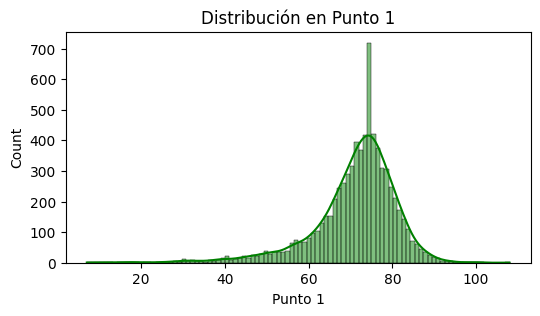

In [10]:
# Distribución variable en punto 1 o 20 en dataset
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=data, x=20, kde=True,ax=ax, color='green')
ax.set_title("Distribución en Punto 1")
ax.set_xlabel('Punto 1');

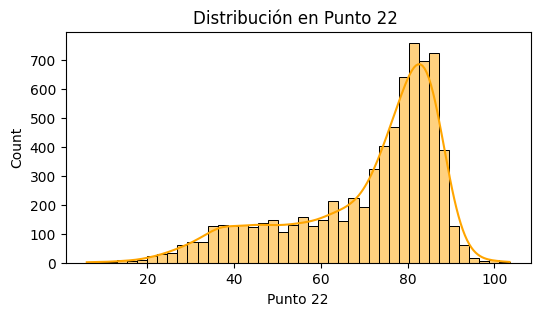

In [11]:
# Distribución variable en punto 22 o 45 en dataset
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=data, x=30, kde=True,ax=ax, color='orange')
ax.set_title("Distribución en Punto 22 ")
ax.set_xlabel('Punto 22');

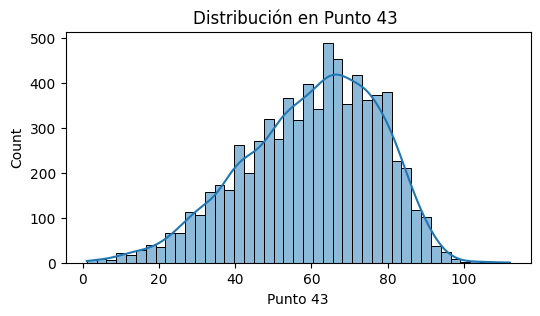

In [12]:
# Distribución variable en punto 43 o 68 en dataset
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=data, x=68, kde=True,ax=ax)
ax.set_title("Distribución en Punto 43 ")
ax.set_xlabel('Punto 43');

In [13]:
X=data[[68]]
y=data['Mes']
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
modelo = LinearRegression()
modelo.fit(X=X_train.reshape(-1,1), y = y_train)

LinearRegression()

In [14]:
prediccion = modelo.predict(X = X_test)
print(prediccion[0:3,])
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediccion,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[6.7179913 ]
 [6.48791559]
 [6.28544897]]

El error (rmse) de test es: 3.392158190262745


In [15]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.31
Date:                Wed, 03 May 2023   Prob (F-statistic):           0.000778
Time:                        05:23:49   Log-Likelihood:                -13610.
No. Observations:                5115   AIC:                         2.722e+04
Df Residuals:                    5113   BIC:                         2.724e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0769      0.171     41.297      0.0

In [16]:
prediccion = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.01)
prediccion.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6.515525,0.048481,6.390599,6.640450,-2.407412,15.438461
1,6.708788,0.073205,6.520154,6.897423,-2.215267,15.632844
2,6.441300,0.054321,6.301326,6.581275,-2.481860,15.364460
3,6.230231,0.099918,5.972762,6.487699,-2.695545,15.156007


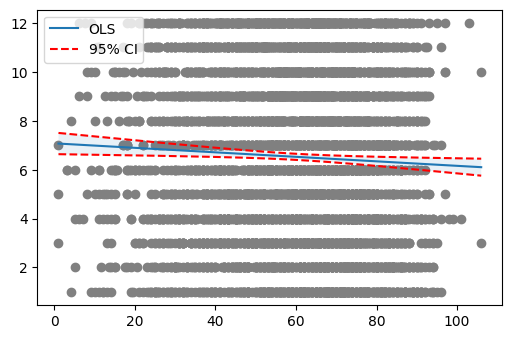

In [17]:
prediccion = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.01)
prediccion['x'] = X_train[:, 1]
prediccion['y'] = y_train
prediccion = prediccion.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(prediccion['x'], prediccion['y'], marker='o', color = "gray")
ax.plot(prediccion['x'], prediccion["mean"], linestyle='-', label="OLS")
ax.plot(prediccion['x'], prediccion["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(prediccion['x'], prediccion["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(prediccion['x'], prediccion["mean_ci_lower"], prediccion["mean_ci_upper"], alpha=0.1)
ax.legend();

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
import tensorflow as tf

In [74]:
training_data=X_train
target_data=X_test

In [75]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='relu'))

In [76]:
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['AUC'])
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['AUC'])

In [79]:
model.fit(training_data, target_data, epochs=100)

ValueError: Data cardinality is ambiguous:
  x sizes: 5115
  y sizes: 2193
Make sure all arrays contain the same number of samples.